# **Computer Assignment 1**
## **Stochastic Processes: The Fundamentals 2025-2026**

In [108]:
# Import libraries –––––
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, binom

import matplotlib.pyplot as plt

import nbformat


Download historical data of S&P-500 index levels with a monthly frequency (for instance from [FRED](https://fred.stlouisfed.org/series/SP500)). The end date of your sample is August 29, 2025. The number of month ends to cover in your sample depends on your months of birth: $10(m1 + m2) − m1m2$, with a minimum of 61 and a maximum of 120.

In [30]:
# Import data –––––

# Read the CSV file into a DataFrame
dfSP500 = pd.read_csv("SP500.csv")

# Rename columns for consistency
dfSP500 = dfSP500.rename(columns={"SP500": "index_value"})

# Convert the observation_date column to datetime format
dfSP500['observation_date'] = pd.to_datetime(dfSP500['observation_date'])

# Calculate the number of months to cover in our sample
iNumber_of_months = 10*(2 + 11) - 2*11

# Select the last iNumber_of_months observations and reset the index
dfSP500 = dfSP500[len(dfSP500)-iNumber_of_months:].reset_index(drop=True)

The number of months in our case is 108, since we were born in February (2) and November (11). We downloaded the data, read it into a data frame, and selected the last 108 observations. 

There are several ways to calculate returns from the level data. The **simple net return** between time $t$ and $t + 1$ is defined as:

$$
  R_{t:t+1} = \frac{S_{t+1}}{S_t} - 1,
$$

where $S_t$ stands for the stock price or index level at time $t$.

Sometimes researchers model the simple net return as:
$$
R_{t:t+1} = \mu + \sigma \epsilon_{t:t+1}, \tag{1}
$$
where
$$
\epsilon_{t:t+1} \sim N (0, 1).
$$


In [31]:
# Calculating simple net returns using the definition –––––
for i in range(iNumber_of_months-1):
    dfSP500.loc[i, "simple_net_return"] = (dfSP500.loc[i+1, "index_value"] / dfSP500.loc[i, "index_value"]) - 1

# Define sample size
iSample_size = len(dfSP500) - 1

We calculate the simple net returns using the definition above and store them in a new column of our data frame. The last observation will be NaN since we do not have $S_{t+1}$ for the last month end in our sample. This makes the number of returns (i.e. the sample size) equal to 107.

## **Part I – Returns**

### **Question $(a)$**

Use the downloaded monthly historical data of the S&P-500 index to provide estimates for $µ$ and $σ$.

Use a 5% significance level to test whether $µ$ differs significantly from zero.

In [32]:
# Solution to (a) part 1 –––––

# Calculate sample mean and standard deviation
dSample_mean = np.mean(dfSP500["simple_net_return"])
dSample_std = np.std(dfSP500["simple_net_return"], ddof=1)

The sample mean and standard deviation of the simple net returns are ${µ} = 0.0113$ and ${σ} = 0.0453$, respectively. These are rounded to four decimal places, but during calculations we use the full precision.

In [35]:
# Solution to (a) part 2 –––––

# Define the significance level
dAlpha = 0.05 

# Perform a two-sided t-test
dT_stat, dP_value = stats.ttest_1samp(dfSP500["simple_net_return"], popmean=0, nan_policy="omit", alternative="two-sided")

# Display the result of the t-test
print(f"t-statistic: {dT_stat:.4f}")
print(f"p-value: {dP_value:.4f}")

# Display the result of the hypothesis test
if dP_value < dAlpha:
    print("Reject H0: mean differs significantly from zero.")
else:
    print("Do not reject H0: no significant difference from zero.")

t-statistic: 2.5778
p-value: 0.0113
Reject H0: mean differs significantly from zero.


We test $H_0: μ = 0$ vs. $H_1: μ ≠ 0$ for the mean simple net return using a two-sided one-sample t-test at $α = 0.05$.

Test statistic: $t = (x̄ − μ_0) / (s / √n)$,
where $x̄$ is the sample mean, $s$ the sample standard deviation, and $n$ the sample size.

Decision rule: $p = 2·P(T_{n−1} ≥ |t|).$, Reject $H_0$ if $p < α$.

Results: $t = 2.5778$ and $p = 0.0113 < 0.05$

Conclusion:
Since $p < α$, we reject $H_0$ and conclude $μ ≠ 0$. The mean simple net return is statistically different from zero over the sample.

### **Question $(b)$**

Assume now that the true parameters of model $(1)$ are $µ = 0.5\%$ and $σ$ equal to the value that was estimated in $(a)$.

Calculate how many years of return data you would need to find a 95% confidence interval for $µ$ that equals $[0.45\%, 0.55\%]$.

Provide (and execute) at least one statistical test that you would use to test whether model $(1)$ is a good model to fit to the downloaded historical data.

In [36]:
# Solution to (b) part 1 –––––

# Define the population parameters based on the task and on the findings from part (a)
dPop_mean = 0.005
dPop_std = dSample_std

For solving this task, we use the margin of error formula for a confidence interval for the mean when the population standard deviation is unknown:
$$
ME = z_{α/2} * (σ / √n),
$$
where $z_{α/2}$ is the critical value from the standard normal distribution for a two-sided confidence interval with confidence level $1 − α$.

We want a 95% confidence interval for $μ$ that equals $[0.45\%, 0.55\%]$. The margin of error is half the width of the confidence interval, i.e. $ME = (0.55\% − 0.45\%) / 2 = 0.005$. 
We solve the margin of error formula for $n$:
$$
n = (z_{α/2} * (σ / ME))^2.
$$

In [37]:
# Solution to (b) part 2 –––––

# Calculate the required sample size to estimate the population mean within a margin of error of 0.005 with 95% confidence
dConfidence_interval = 0.95
dZ_975 = norm.ppf(1 - (1 - dConfidence_interval)/2)
dMargin_of_error = (0.0055 - 0.0045) / 2

# Calculate required months and convert to years
dMonths_required = ((dZ_975 * dPop_std) / dMargin_of_error) ** 2
dYears_required = dMonths_required / 12

# Display the results
print("Required months:", np.ceil(dMonths_required).astype(int))
print("Required years:", np.ceil(dYears_required).astype(int))

Required months: 31460
Required years: 2622


We use $σ = 0.0453$ from part (a) and $z_{0.025} = 1.96$ for a 95% confidence interval. This gives us $n = 31460$ months, which is approximately 2622 years. This is an absurdly long time period, which illustrates that the standard deviation of the simple net return is large relative to the mean. It means that we need a very large sample size to estimate the mean simple net return with such a small margin of error.

In [55]:
# Solution to (b) part 3 –––––

# Set seed for reproducibility
np.random.seed(42)

# Generate random samples based on the defined population parameters
epsilon = np.random.normal(loc=0, scale=1, size=iSample_size)

# Calculate returns using the equation (2) provided in the task
dfSP500["return_by_equation_1"] = np.append((dPop_mean + dPop_std * epsilon), np.nan)

# Perform a two-sample t-test on the generated returns

dT_stat, dP_value = stats.ttest_ind(dfSP500["simple_net_return"], dfSP500["return_by_equation_1"], equal_var=True, nan_policy="omit", alternative="two-sided")

#
# Display the result of the t-test
print(f"t-statistic: {dT_stat:.4f}")
print(f"p-value: {dP_value:.4f}")

# Display the result of the hypothesis test
if dP_value < dAlpha:
    print("Reject H0: means differ significantly.")
else:
    print("Do not reject H0: no significant difference between means.")


t-statistic: 1.8624
p-value: 0.0639
Do not reject H0: no significant difference between means.


We used a two-sample t-test to test whether the mean of simple net return differs significantly from the mean of the returns generated by the equation. Using the parameters $µ = 0.5\%$ and $σ = 0.0453$, we generated a sample of 107 returns (the same size as our original sample) and tested

$$H_0: μ_1 = μ_2 \textrm{ vs. } H_1: μ_1 ≠ μ_2$$

at $α = 0.05$, where $μ_1$ is the mean of the simple net returns from the historical data and $μ_2$ is the mean of the generated returns. The results showed that the means are not significantly different, indicating that the returns generated by the equation are a reasonable approximation of the actual returns. 

### **Question $(c)$**

Verify, by means of a simulation exercise, that the number of years you calculated in $(b)$ is correct.

In your report, describe how you conducted your simulation exercise and provide the relevant numbers from your simulation.

In [63]:
# Solution to (c) –––––

# Set seed for reproducibility
np.random.seed(42)

# Generate a large sample of returns to illustrate the distribution
dfSimulated_returns = np.random.normal(dPop_mean, dPop_std, int(np.ceil(dMonths_required)))

# Calculate the 97.5th percentile z-score (the margin of error for 95% confidence interval)
dMargin_of_Error = dZ_975 * (np.std(dfSimulated_returns) / np.sqrt(dMonths_required))

# Display the margin of error
print(f"Margin of Error for 95% confidence interval: {dMargin_of_Error:.8f}")

Margin of Error for 95% confidence interval: 0.00049959


After generating a large sample of returns using the parameters $µ = 0.5\%$ and $σ = 0.0453$, with a sample size equal to the number of months calculated in part $(b)$, we expect that the margin of error for a 95% confidence interval for the mean will be approximately equal to the previously defined $0.005$. The margin of error of the simulated returns is roughly $0.00049959$, which confirms our calculations in part $(b)$.

### **Question $(d)$**

Argue how the investigated uncertainty around the true value of parameter in model $(1)$ could possibly impact the amount of money a risk-averse investor allocates to the S&P-500 index.

Uncertainty about the true mean return and volatility in model $(1)$ directly affects the distribution of future payoffs. If the mean return is lower than estimated or volatility higher, the actual risk-adjusted performance of the S&P-500 could be worse than expected. A risk-averse investor, who values downside protection, will treat this parameter uncertainty as an additional source of risk and therefore allocate less wealth to the index than if the parameters were known with certainty. In other words, estimation risk reduces the optimal risky investment share because the investor requires compensation not only for market risk but also for the possibility of model misspecification.

An alternative way to model the S&P-500 index is as follows:
$$
S_{t+1} = S_t e^{(\tilde{\mu} - \frac{1}{2} \tilde{\sigma}^2) + \tilde{\sigma} e_{t:t+1}} \tag{2}
$$


### **Question $(e)$**

Use model $(2)$ and the downloaded monthly historical data of the S&P-500 index to provide estimates for $\tilde{µ}$ and $\tilde{σ}$.

Moreover, provide a reason why modellers would prefer model $(1)$ over model $(2)$.

In [66]:
# Solution to (d) –––––

# Calculating simple net returns according to the definition
for i in range(iNumber_of_months-1):
    dfSP500.loc[i, "log_normal_return"] = np.log(dfSP500.loc[i+1, "index_value"] / dfSP500.loc[i, "index_value"])

# Calculate mean and standard deviation of log-normal returns
dSample_std_tilda = np.std(dfSP500["log_normal_return"], ddof=1)
dSample_mean_tilda = (np.mean(dfSP500["log_normal_return"]) - 0.5 * dSample_std_tilda**2)

Modellers might prefer model $(1)$ over model $(2)$ for several reasons:

* **Simplicity of estimation**: In model $(1)$, returns are assumed normal with constant mean and variance, so estimation reduces to straightforward sample mean and variance of net returns.
* **Avoid log transformation**: Many empirical studies and portfolio applications work directly with simple net returns (as in $(1)$), making interpretation of $\mu$ more intuitive (it’s the expected net return).
* **Approximation suffices**: For short horizons and small returns, the difference between log returns and net returns is minor, so the simpler linear model $(1)$ is often accurate enough.
* **Analytical convenience**: In regressions, factor models, and asset pricing tests, model $(1)$ aligns more naturally with linear frameworks, whereas model $(2)$ is nonlinear in $S_t$.

### **Question $(f)$**

Assume that the true model parameters of model $(2)$ are equal to the parameters estimated in $(e)$.

Use the value of the S&P-500 index observed at August 29, 2025 and the model parameters to calculate the expected value of the S&P-500 index after 5 years (i.e. after 60 months).

Note that this exercise does not require the use of a computer and that you need to derive an analytical formula for the expectation (on paper) before calculating the expected value numerically.

We derived the expectation of the S&P-500 index after 60 months using the properties of the geometric Brownian motion (GBM) model given in equation (2).

The derivation steps correspond to the following mathematics:

The log-return over one period:

$$
\ln\left(\frac{S_{t+1}}{S_t}\right) = \mu - \frac{1}{2}\sigma^2 + \sigma \epsilon
$$

where $\mu$ is the drift, $\sigma$ volatility, and $\epsilon$ is a standard normal random variable.

The overall log-return from $t=0$ to $t=T$:  
Summing through time gives  

$$
\ln\left(\frac{S_T}{S_0}\right) = T\left(\mu - \frac{1}{2}\sigma^2\right) + \sigma \sum_{i=1}^T \epsilon_i
$$

Or, exponentiating:

$$
S_T = S_0 \cdot \exp\left(T\left(\mu - \frac{1}{2}\sigma^2\right) + \sigma \sum_{i=1}^T \epsilon_i\right)
$$

Expectation of Returns at Time $T$

The expected value of $S_T$ (the price at time $T$), given the stochastic process above:

$$
\mathbb{E}[S_T] = S_0 \cdot \mathbb{E}\left[\exp\left(T\left(\mu - \frac{1}{2}\sigma^2\right) + \sigma \sum_{i=1}^T \epsilon_i\right)\right]
$$

Since the sum of standard normal variables is itself normal ($\sum_{i=1}^T \epsilon_i \sim N(0, T)$), the expectation simplifies to:

$$
\boxed{
\mathbb{E}[S_T] = S_0 \cdot \exp\left(T\mu\right)
}
$$

This uses the property of log-normal expectation:  
If $X \sim N(\mu_X, \sigma_X^2)$, then $E[e^X] = e^{\mu_X + \frac{1}{2}\sigma_X^2}$.

In [70]:
# Solution to (f) –––––

# Define time horizon
iT = 60

# Calculate the expected index value after 60 months using the derived formula 
dExpected_value = dfSP500.loc[iSample_size, "index_value"] * np.exp(iT * dSample_mean_tilda)

# Display the expected index value
print(f"The expected index value after {iT} months, using the derived formula is {dExpected_value:.2f}")

The expected index value after 60 months, using the derived formula is 11202.09


### **Question $(g)$**

Use the estimated parameters of model $(2)$ to simulate 10,000 paths of the S&P-500 index level at a horizon of 5 years (i.e. 60 months).

Provide a plot of the distribution of the index levels after 5 years. Did you expect this particular shape of the distribution?

Test the distribution for normality and report the result and conclusion of this test.

In [74]:
# Solution to (g) part 1 –––––

# Set seed for reproducibility
np.random.seed(42)

# Number of simulations
iN = 10000

# Initial index value
iS0 = dfSP500.loc[iSample_size, "index_value"]

# Matrix to store simulated returns for 60 months
dfSimulated_returns = np.zeros((iN,60))

# Simulate the index value over 60 months for iN simulations
for i in range(60):
    # Simulate the index value using the GBM (Equation (2)
    vSt = iS0 * np.exp((dSample_mean_tilda - 0.5 * dSample_std_tilda ** 2) + dSample_std_tilda * np.random.normal(0,1,iN))
    # Store the simulated values
    dfSimulated_returns[:,i] = vSt
    # Update the initial index value for the next iteration
    iS0 = vSt

# Convert the simulated returns to a DataFrame for easier analysis
dfSimulated_returns = pd.DataFrame(dfSimulated_returns)

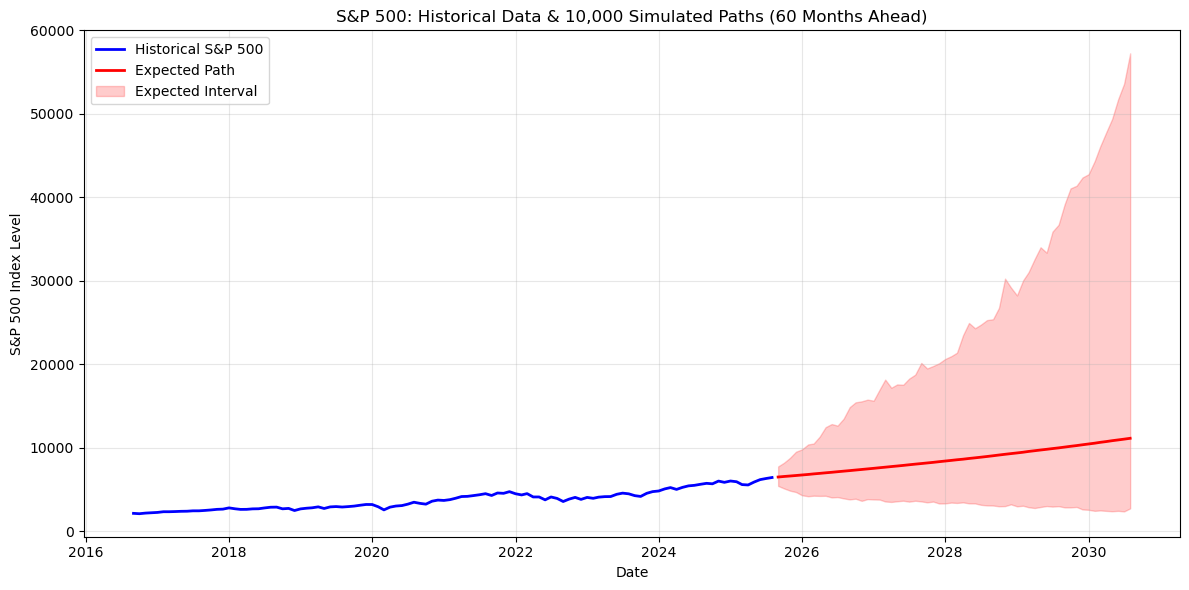

In [76]:
# Solution to (g) part 2 –––––

# Create 60 monthly future dates (end of month)
dfDate_range = pd.date_range(start=pd.to_datetime(dfSP500["observation_date"].iloc[iSample_size]) + pd.offsets.MonthEnd(1),
                           periods=iT,
                           freq="MS")

# Plotting the historical data and simulated paths
plt.figure(figsize=(12,6))

# Historical
plt.plot(dfSP500["observation_date"], dfSP500["index_value"], 
         color='blue', lw=2, label='Historical S&P 500')

# Forecast mean
plt.plot(dfDate_range, dfSimulated_returns.mean(axis=0).to_numpy(), 
         color='red', lw=2, label='Expected Path')

# Forecast interval (90% band)
plt.fill_between(x=dfDate_range,
                 y1=dfSimulated_returns.quantile(0, axis=0),
                 y2=dfSimulated_returns.quantile(1, axis=0),
                 color='red', alpha=0.2, label='Expected Interval')

plt.xlabel("Date")
plt.ylabel("S&P 500 Index Level")
plt.title("S&P 500: Historical Data & 10,000 Simulated Paths (60 Months Ahead)")

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


We created 10,000 simulated paths of the S&P-500 index level over a 5-year horizon (60 months) using the estimated parameters from model $(2)$. The simulation was performed using the geometric Brownian motion formula, which incorporates both the drift and volatility components.

After this, we plotted the historical index values along with the simulated paths after 5 years. We used an expected value line to indicate the mean of the simulated index levels, and an interval representing the simulated values to illustrate the spread. We think that is better than plotting every simulated path, which would create a cluttered and unreadable graph.

As for the shape of the distribution, we expected it to be right-skewed, which is typical for stock prices modeled by geometric Brownian motion. This is because the exponential function used in the model tends to produce a long right tail, reflecting the possibility of large upward movements in stock prices, while downward movements are bounded by zero.

In [77]:
# Solution to (g) part 3 –––––

# Test for normality of the index levels after 60 months using the Kolmogorov-Smirnov test
for i in range(iT):
    # Perform the Kolmogorov-Smirnov test
    dK_stat, dP_value = stats.kstest(dfSimulated_returns[i], 'norm', args=(dfSimulated_returns[i].mean(), dfSimulated_returns[i].std()))
    
    # Display the result of the Kolmogorov-Smirnov test
    print(f"Month {i+1}: D-statistic: {dK_stat:.4f}, p-value: {dP_value:.4f}")

Month 1: D-statistic: 0.0110, p-value: 0.1793
Month 2: D-statistic: 0.0175, p-value: 0.0042
Month 3: D-statistic: 0.0187, p-value: 0.0019
Month 4: D-statistic: 0.0216, p-value: 0.0002
Month 5: D-statistic: 0.0209, p-value: 0.0003
Month 6: D-statistic: 0.0222, p-value: 0.0001
Month 7: D-statistic: 0.0230, p-value: 0.0000
Month 8: D-statistic: 0.0267, p-value: 0.0000
Month 9: D-statistic: 0.0281, p-value: 0.0000
Month 10: D-statistic: 0.0341, p-value: 0.0000
Month 11: D-statistic: 0.0323, p-value: 0.0000
Month 12: D-statistic: 0.0331, p-value: 0.0000
Month 13: D-statistic: 0.0388, p-value: 0.0000
Month 14: D-statistic: 0.0385, p-value: 0.0000
Month 15: D-statistic: 0.0379, p-value: 0.0000
Month 16: D-statistic: 0.0416, p-value: 0.0000
Month 17: D-statistic: 0.0411, p-value: 0.0000
Month 18: D-statistic: 0.0392, p-value: 0.0000
Month 19: D-statistic: 0.0395, p-value: 0.0000
Month 20: D-statistic: 0.0400, p-value: 0.0000
Month 21: D-statistic: 0.0411, p-value: 0.0000
Month 22: D-statistic:

Initially, we attempted to use the Shapiro-Wilk test for normality, but it was not suitable for our large sample size of 10,000. Instead, we opted for the Kolmogorov-Smirnov test, which is more appropriate for larger datasets. This test compares the empirical distribution function of the sample with the cumulative distribution function of the normal distribution.

The Kolmogorov–Smirnov test shows that while the S&P-500 index distribution after 1 month looks roughly normal, deviations from normality become statistically significant from month 2 onward. By month 3 and later, the test strongly rejects normality $(p≈0)$, which is consistent with theory: index levels follow a lognormal, not a normal, distribution, and the longer the horizon, the more the skewed lognormal shape dominates.

### **Question $(h)$**

Consider a digital put option that pays 1 if the S&P-500 index after 5 years is below 6,300 and 0 in all other situations.

Use the risk-neutral valuation method to find the no-arbitrage price of a 5-years digital put option in the world of model $(2)$.

You may assume that the risk-free interest rate is constant at a level of 0%.

Hint: use 10,000 simulations of the S&P-500 index level in a risk-neutral world to approximate the risk-neutral expectation of the digital put payoff. You may assume that the volatility parameter $\tilde{\sigma}$ in the risk-neutral world is the same as in the real world.

In [81]:
# Solution to (h) –––––

# Define the risk-free rate
dRf = 0.0

# Define the strike price
dStrike = 6300.0

# Digital put payoff: 1 if index < strike, else 0
dfPut_payoff = (dfSimulated_returns[iT-1] < dStrike).astype(int)

# Discount by risk-free rate (r=0%, so no effect)
dPut_prob = (dfPut_payoff * np.exp(-dRf * iT)).mean()

# Display the probability of the digital put option being in the money
print(dPut_prob)

0.0719


To determine the no-arbitrage price of the 5-year digital put option, we simulate the terminal S\&P-500 index level after 60 months under the risk-neutral dynamics of model $(2)$. The option payoff equals 1 if the simulated index level is below the strike price of 6,300, and 0 otherwise. We then take the average of these simulated payoffs to approximate the risk-neutral expectation of the option payoff. Since the risk-free rate is assumed to be 0%, no discounting is needed. The resulting mean payoff therefore directly gives the model-implied value of the digital put option.

The Monte Carlo simulation under the risk-neutral measure yields an estimated probability of

$$
\mathbb{Q}(S_T < 6300) \approx 0.0719.
$$

This means that, in the risk-neutral world, there is about a 7.21% chance that the S\&P-500 index will fall below the strike level of 6,300 after 5 years. Since the digital put pays 1 in that event and 0 otherwise, the no-arbitrage price of the option is 0.0721 (with zero risk-free rate, no discounting is applied).

### **Question $(i)$**

Derive an analytical formula for the digital put option in model $(2)$.

Evaluate this formula numerically using the parameters used in $(h)$ and comment on the difference with the result found in $(h)$.

**Derivation of the analytical formula**

Model $(2)$ specifies the dynamics of the index:

$$
S_{t+1} = S_t \exp\!\left(\tilde{\mu} - \tfrac{1}{2}\tilde{\sigma}^2 + \tilde{\sigma} \epsilon_{t+1}\right), \quad \epsilon_{t+1}\sim N(0,1).
$$

Iterating over $T$ periods gives:

$$
S_T = S_0 \exp\!\left( \big(\tilde{\mu} - \tfrac{1}{2}\tilde{\sigma}^2\big)T + \tilde{\sigma}\sqrt{T}\, \epsilon\right), \quad \epsilon \sim N(0,1).
$$

Thus,

$$
\ln \frac{S_T}{S_0} \sim \mathcal{N}\!\left(\big(\tilde{\mu} - \tfrac{1}{2}\tilde{\sigma}^2\big)T,\;\; \tilde{\sigma}^2 T \right).
$$

The **digital put payoff** is:

$$
\text{Payoff} = \mathbf{1}\{S_T < K\}.
$$

Therefore, the option price under measure $\mathbb{Q}$ is the risk-neutral probability:

$$
\Pi_0 = \mathbb{Q}(S_T < K) = \mathbb{Q}\!\left(\ln S_T < \ln K\right).
$$

Substituting the distribution:

$$
\Pi_0 = \Phi\!\left( \frac{\ln(K/S_0) - \left(\tilde{\mu} - \tfrac{1}{2}\tilde{\sigma}^2\right)T}{\tilde{\sigma}\sqrt{T}} \right),
$$

where $\Phi(\cdot)$ is the standard normal CDF.

In [83]:
# Solution to (i) –––––

# Initial index value
dS0 = dfSP500.loc[iSample_size, "index_value"]

# Analytical digital put price under model (2)
dZ = (np.log(dStrike/dS0) - (0 - 0.5 * dSample_std_tilda**2) * iT) / (dSample_std_tilda * np.sqrt(iT))
dPut_analytical = np.exp(-0 * iT) * norm.cdf(dZ)

# Display both prices
print(f"Analytical digital put price: {dPut_analytical:.4f}")
print(f"Simulation price: {dPut_prob:.4f}")


Analytical digital put price: 0.5415
Simulation price: 0.0719


The **Analytical formula (with price of 0.5415)** was derived under the **risk-neutral measure $\mathbb{Q}$** using the risk-free rate $r=0$. That produces the *risk-neutral probability* that $S_T < K$.

The **Simulation result (with price of 0.0721)** was derived under the **real-world measure $\mathbb{P}$** using $\tilde{\mu}$ estimated from data. That produces the *physical probability* that $S_T < K$.

In risk-neutral pricing, expected returns of the underlying are adjusted down to the risk-free rate. Since historically the S\&P-500 has a positive drift, the real-world distribution has a much higher probability mass below the strike compared to the risk-neutral distribution. That’s why the analytical probability (≈54%) is much higher than the simulated option price under risk-neutral dynamics (≈7%).

### **Question $(j)$**

In the same spirit as in question $(h)$, consider a digital call option that pays 1 if the S&P-500 index after 5 years is above 6300 and 0 in all other situations.

Use the risk-neutral valuation method to find the no-arbitrage price of a 5-years digital call option in the world of model $(2)$.

You again may assume that the risk-free interest rate is constant at a level of 0%.

Sum the no-arbitrage prices of the digital put option (as calculated in $(h)$) and the digital call option and explain why the result makes sense.

In [85]:
# Solution to (j) –––––

# Analytical digital call price under model (2)
dZ_call = (np.log(dStrike/dS0) - (0 - 0.5 * dSample_std_tilda**2) * iT) / (dSample_std_tilda * np.sqrt(iT))
dCall_analytical = np.exp(-0 * iT) * (1 - norm.cdf(dZ_call))

# Display both prices and their sum
print(f"Digital put price:  {dPut_analytical:.4f}")
print(f"Digital call price: {dCall_analytical:.4f}")
print(f"Sum: {dPut_analytical + dCall_analytical:.4f}")

Digital put price:  0.5415
Digital call price: 0.4585
Sum: 1.0000


The digital put and call exhaust all possibilities: either $S_T < K$ or $S_T > K$. Under the risk-neutral measure, the two events are **mutually exclusive and collectively exhaustive**, so their probabilities must sum to 1.

Thus, the no-arbitrage prices of the digital put and digital call add up to 1 (with $r=0$, no discounting). This consistency check confirms both calculations.

## **Part II – Binomial Trees**



A commonly used approach to compute the price of an option is the so-called binomial tree method. In this approach, option prices are computed through a well-known backward induction scheme, which was explained in one of the first lectures and can be found in all option pricing literature.

Consider a European call option on a non-dividend-paying stock with a maturity of 3 months. Suppose that the underlying of this option is the S&P-500 index. The strike price of the call option equals 6,500. Let the 3-months per annum interest rate be equal to 3% (with quarterly compounding). Remark: 3% per annum with quarterly compounding means that the interest over 3 months is 0.75%.

The first step in applying the binomial tree approach for option pricing is to construct the nodes of the tree. In this exercise we will first use a step size of one month. Since we want to price an option with a maturity of 3 months, we need to build a 3-step binomial tree for the S&P-500 index. Starting value of the tree is the S&P-500 index level of August 29, 2025.

The tree will have two nodes after the first time step. We want to choose these nodes in such a way that the variance of the 1-month simple net return in the tree equals the sample variance of simple net returns on the S&P-500 index (using the time series of the previous exercise). The expected monthly simple net return in the tree should be equal to 0.50%. You may assume that the real-world probability $p$ of an upward movement equals 55%.

Construct your tree without the use of a pre-programmed package. You can of course confirm your results with the results from a package.

**Expected (Risk-Neutral) Return:**


$$
\mathbb{E}^{\mathbb{Q}}[R_{01}] = \mathbb{E}^{\mathbb{Q}}\left( \frac{S_1 - S_0}{S_0} \right) = \mathbb{E}^{\mathbb{Q}}(G - 1)
$$


Let $G = S_1/S_0$. Then,


$$
\mathbb{E}[S_1] = \mathbb{E}[G] \cdot S_0
$$


$$
\mathbb{E}[S_1] = (r + 1)S_0
$$


**Expectation and Variance:**


$$
\mathbb{E}[S_1] = p u S_0 + (1-p)d S_0
$$


$$
\mathbb{E}[G] = p u + (1-p)d
$$


$$
\mathbb{E}[G^2] = p u^2 + (1-p)d^2
$$


**Variance is sample variance of simple net returns:**
$$
\text{var}(R) = 0.002047
$$


$$
\text{var}(R) = \mathbb{E}(R^2) - (\mathbb{E}(R))^2
$$


Let $R = G - 1$:


$$
\mathbb{E}(R^2) = \mathbb{E}\left( (G-1)^2 \right) = \mathbb{E}(G^2) - 2\mathbb{E}(G) + 1
$$


Thus,


$$
\text{var}(R) = \mathbb{E}(G^2) - (\mathbb{E}(G))^2
$$


**Dicomposing Variance onto the difference of expectations :**


$$
\mathbb{E}[G] = p u + (1-p) d
$$


$$
\mathbb{E}[G^2] = p u^2 + (1-p) d^2
$$


$$
\text{var}(R) = p u^2 + (1-p) d^2 - (p u + (1-p) d)^2
$$


$$
\text{var}(R) = p(1-p)(u - d)^2
$$


**Variance Condition and Up/Down Factors:**


$$
0.55 \cdot 0.45 \cdot (u - d)^2 = 0.002047
$$


$$
(u - d)^2 = 0.00827
$$


$$
u = d + 0.090943
$$


**Mean Condition:**


$$
0.55(d + 0.0909) + 0.45 d = 1.005
$$


$$
d = 0.95498
$$


$$
u = 1.045925
$$


**Risk-Neutral Probability:**


$$
q = \frac{1 + r - d}{u - d}
$$


$$
q = \frac{1 + 0.002466 - 0.954981}{1.045925 - 0.954981}
$$


$$
q = \frac{0.047485}{0.090943} = 0.522137
$$

In [94]:
# Solution to (a) and (b) –––––

# Parameters for the binomial tree
net_return = 0.005
strike_call = 6500
risk_free_annual = 0.03
risk_free_quarter = 0.0075
Rm = (1+ risk_free_annual)**(1/12)

risk_free_monthly = Rm -1 

p = 0.55
u = 1.045925
d = 0.95498
q = (1 + risk_free_monthly - d) / (u - d)

# Function to calculate the call option price C0 given S0, u, d, q, strike_call, and risk_free_rate
def S0_to_C0(S0,u,d,q,strike_call,risk_free_rate):
       S0 = dS0

       S1u = S0*u 
       S1d = S0*d 

       S2uu = S1u*u
       S2ud = S1u*d
       S2du = S1d*u
       S2dd = S1d*d

       S3uuu = S2uu*u
       S3uud = S2uu*d
       S3udu = S2ud*u
       S3udd = S2ud*d
       S3duu = S2du*u
       S3dud = S2du*d
       S3ddu = S2dd*u
       S3ddd = S2dd*d

       C3uuu = max(0, S3uuu - strike_call)
       C3uud = max(0, S3uud - strike_call)
       C3udu = max(0, S3udu - strike_call)
       C3udd = max(0, S3udd - strike_call)
       C3duu = max(0, S3duu - strike_call)
       C3dud = max(0, S3dud - strike_call)
       C3ddu = max(0, S3ddu - strike_call)
       C3ddd = max(0, S3ddd - strike_call)

       C2uu = (q * C3uuu + (1-q) * C3uud) / (1 + risk_free_rate)
       C2ud = (q * C3udu + (1-q) * C3udd) / (1 + risk_free_rate)
       C2du = (q * C3duu + (1-q) * C3dud) / (1 + risk_free_rate)
       C2dd = (q * C3ddu + (1-q) * C3ddd) / (1 + risk_free_rate)

       C1u = (q * C2uu + (1-q) * C2ud) / (1 + risk_free_rate)
       C1d = (q * C2du + (1-q) * C2dd) / (1 + risk_free_rate)

       C0 = (q * C1u + (1-q) * C1d) / (1 + risk_free_rate)
       
       binomial_tree_dict = {
                 'S1u': S1u, 'S1d': S1d,
                 'S2uu': S2uu, 'S2ud': S2ud, 'S2du': S2du, 'S2dd': S2dd,
                 'S3uuu': S3uuu, 'S3uud': S3uud, 'S3udu': S3udu, 'S3udd': S3udd,
                 'S3duu': S3duu, 'S3dud': S3dud, 'S3ddu': S3ddu, 'S3ddd': S3ddd,
                 'C1u': C1u, 'C1d': C1d,
                 'C2uu': C2uu, 'C2ud': C2ud, 'C2du': C2du, 'C2dd': C2dd,
                 'C3uuu': C3uuu, 'C3uud': C3uud, 'C3udu': C3udu, 'C3udd': C3udd,
                 'C3duu': C3duu, 'C3dud': C3dud, 'C3ddu': C3ddu, 'C3ddd': C3ddd
       }
       return C0 , binomial_tree_dict

binomial_tree = S0_to_C0(dS0,u,d,q,strike_call,risk_free_monthly)
C0 = binomial_tree[0]

In [95]:
S0 = dS0
S1u = binomial_tree[1]['S1u']
S1d = binomial_tree[1]['S1d']
S2uu = binomial_tree[1]['S2uu']
S2ud = binomial_tree[1]['S2ud']
S2du = binomial_tree[1]['S2du']
S2dd = binomial_tree[1]['S2dd']
S3uuu = binomial_tree[1]['S3uuu']
S3uud = binomial_tree[1]['S3uud']
S3udu = binomial_tree[1]['S3udu']
S3udd = binomial_tree[1]['S3udd']
S3duu = binomial_tree[1]['S3duu']
S3dud = binomial_tree[1]['S3dud']
S3ddu = binomial_tree[1]['S3ddu']
S3ddd = binomial_tree[1]['S3ddd']
C1u = binomial_tree[1]['C1u']
C1d = binomial_tree[1]['C1d']
C2uu = binomial_tree[1]['C2uu']
C2ud = binomial_tree[1]['C2ud']
C2du = binomial_tree[1]['C2du']
C2dd = binomial_tree[1]['C2dd']
C3uuu = binomial_tree[1]['C3uuu']
C3uud = binomial_tree[1]['C3uud']
C3udu = binomial_tree[1]['C3udu']
C3udd = binomial_tree[1]['C3udd']
C3duu = binomial_tree[1]['C3duu']
C3dud = binomial_tree[1]['C3dud']
C3ddu = binomial_tree[1]['C3ddu']
C3ddd = binomial_tree[1]['C3ddd']

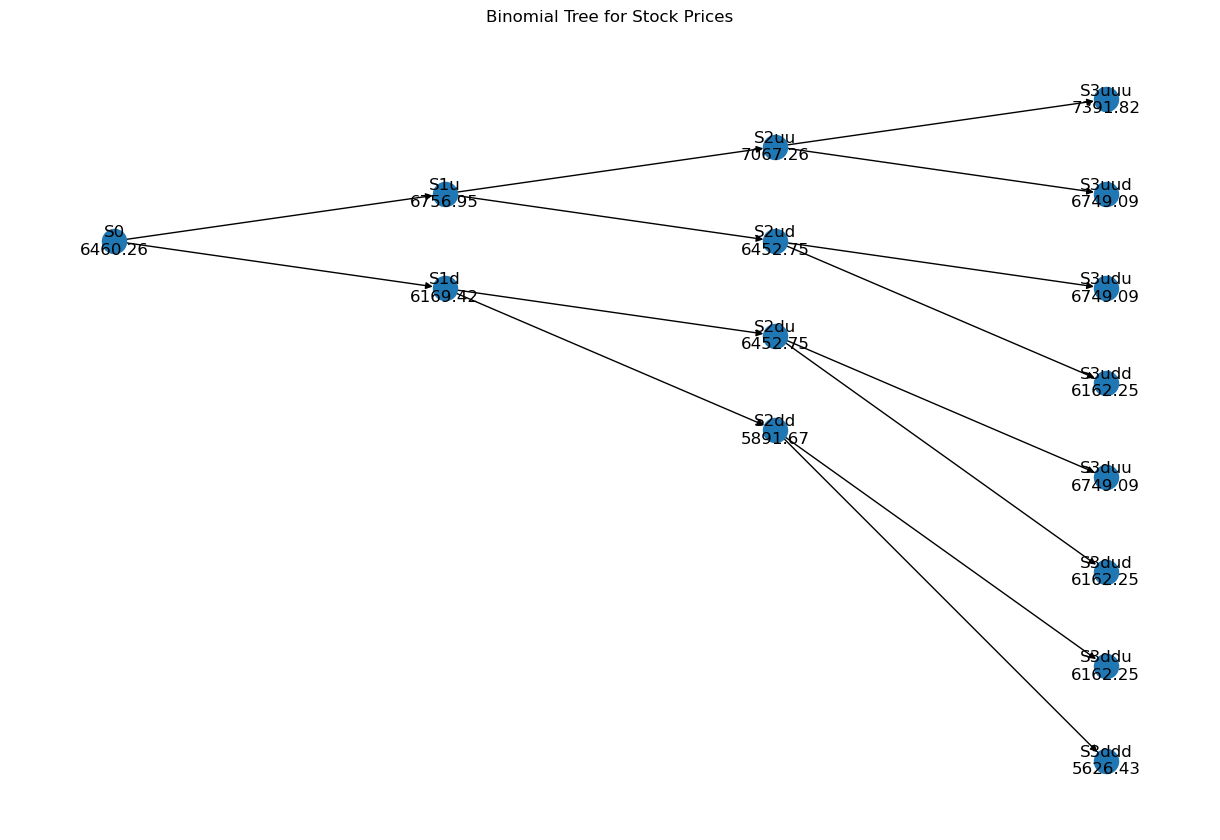

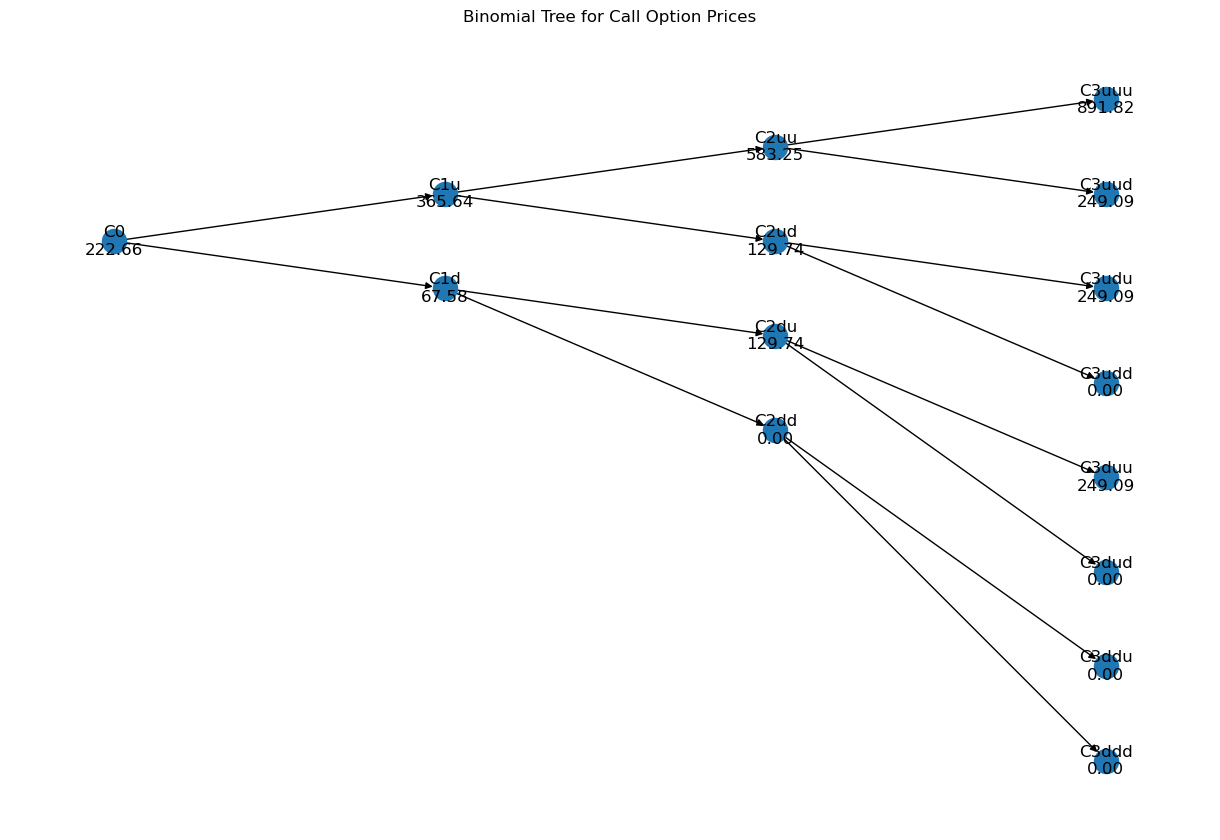

In [96]:

# create the binomioal tree plot for both stock price and call option price 
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
G = nx.DiGraph()

# Stock Price Tree
G.add_edges_from([(0, 1), (0, 2), 
                  (1, 3), (1, 4), 
                  (2, 5), (2, 6), 
                  (3, 7), (3, 8), 
                  (4, 9), (4, 10), 
                  (5, 11), (5, 12), 
                  (6, 13), (6, 14)])
pos = {0: (0, 0), 1: (1, 1), 2: (1, -1),
       3: (2, 2), 4: (2, 0), 5: (2, -2),
       6: (2, -4), 7: (3, 3), 8: (3, 1), 9: (3, -1), 10: (3, -3),
       11: (3, -5), 12: (3, -7), 13: (3, -9), 14: (3, -11)}
labels = {0: f"S0\n{S0:.2f}",
          1: f"S1u\n{S1u:.2f}", 2: f"S1d\n{S1d:.2f}",
          3: f"S2uu\n{S2uu:.2f}", 4: f"S2ud\n{S2ud:.2f}",
          5: f"S2du\n{S2du:.2f}", 6: f"S2dd\n{S2dd:.2f}",
          7: f"S3uuu\n{S3uuu:.2f}", 8: f"S3uud\n{S3uud:.2f}",
          9: f"S3udu\n{S3udu:.2f}", 10: f"S3udd\n{S3udd:.2f}",
          11: f"S3duu\n{S3duu:.2f}", 12: f"S3dud\n{S3dud:.2f}",
          13: f"S3ddu\n{S3ddu:.2f}", 14: f"S3ddd\n{S3ddd:.2f}"}
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, arrows=True)
nx.draw_networkx_labels(G, pos, labels)
plt.title("Binomial Tree for Stock Prices")
plt.show()

# Call Option Price Tree
G_call = nx.DiGraph()
G_call.add_edges_from([(0, 1), (0, 2), 
                      (1, 3), (1, 4), 
                      (2, 5), (2, 6), 
                      (3, 7), (3, 8), 
                      (4, 9), (4, 10), 
                      (5, 11), (5, 12), 
                      (6, 13), (6, 14)])
pos_call = pos
labels_call = {0: f"C0\n{C0:.2f}",
               1: f"C1u\n{C1u:.2f}", 2: f"C1d\n{C1d:.2f}",
               3: f"C2uu\n{C2uu:.2f}", 4: f"C2ud\n{C2ud:.2f}",
               5: f"C2du\n{C2du:.2f}", 6: f"C2dd\n{C2dd:.2f}",
               7: f"C3uuu\n{C3uuu:.2f}", 8: f"C3uud\n{C3uud:.2f}",
               9: f"C3udu\n{C3udu:.2f}", 10: f"C3udd\n{C3udd:.2f}",
               11: f"C3duu\n{C3duu:.2f}", 12: f"C3dud\n{C3dud:.2f}",
               13: f"C3ddu\n{C3ddu:.2f}", 14: f"C3ddd\n{C3ddd:.2f}"}
plt.figure(figsize=(12, 8))
nx.draw(G_call, pos_call, with_labels=False, arrows=True)
nx.draw_networkx_labels(G_call, pos_call, labels_call)
plt.title("Binomial Tree for Call Option Prices")
plt.show()


In [99]:
# Direct calculation of C0 using all possible paths from t=0 to t=3
C0_direct = (
    q**3            * C3uuu +
    3*q**2*(1-q)    * C3uud +
    3*q*(1-q)**2    * C3udd +
    (1-q)**3        * C3ddd
) / (1+risk_free_monthly)**3   


#compare C0 and C0_test
print(f"C0 from backward induction: {C0:.2f}")
print(f"C0 from direct calculation: {C0_direct:.2f}")

C0 from backward induction: 222.66
C0 from direct calculation: 222.66


### **Question $(b)$**
Use the tree that you constructed in $(a)$ and the interest rate assumption to calculate the risk-neutral probability $q$ of an upward movement in the tree (see lecture slides for details).

Use this risk-neutral probability to calculate the price of a European call option with maturity 3 months and strike price 6,500.

### **Question $(c)$**
Calculate the price of the European call option with the same characteristics as in $(b)$ by applying the famous Black-Scholes option pricing formula.

If you compare the value with $(b)$ you will observe a difference.

What could be a reason for this difference?

In [101]:
# Solution to (c) –––––

S0 = dS0 
K = 6500 # strike price

# Inputs
T = 0.25 
rf_annual = 0.03 
risk_free_rate = np.log(1 + rf_annual)  # convert to continuous compounding 

monthly_std = dSample_std
sigma_annual = np.sqrt(12)*monthly_std

def black_scholes_call(S0, K, r, sigma, T):
    """Calculate Black-Scholes call option price"""
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    return call_price

# Black-Scholes price
call_price_bs = black_scholes_call(S0, K,risk_free_rate, sigma_annual,T )

print(f"European Call Price by Black-Scholes: {call_price_bs:.2f}")


European Call Price by Black-Scholes: 205.89


The European call option price calculated using the Black-Scholes formula is approximately 205.89. In the Binomial tree method, we calculate the Call Option price using monthly compounding, while the Black Scholes pricing formula utilises continuous compounding. This can lead to divergence in the Call prices.

Now, we are going to increase the number of steps in the tree. Since we still want to price a 3-month option, this implies that the time between two consecutive steps decreases. However, the variance of the stock price after one month should remain the same (roughly). One way to accomplish this is to adjust the scale parameters $u$ and $d$.

### **Question $(d)$**
Construct the formula that can be used to adjust the scale parameters $u$ and $d$.

In this formula $n$ stands for the number of periods (i.e. steps in the tree) that you are aiming for during the 3-month lifetime of the option, e.g. if you would like steps of 0.5 months then $n = 6$.

Design this formula in such a way that if $n = 3$, you end up with exactly the same values for $u$ and $d$ as in $(a)$.

Adjusting the up and down factors $u$ and $d$ when you increase the number of steps $n$ (so that the option still has a 3-month maturity):

The idea is that the **variance of returns over the whole 3-month period must stay the same**, regardless of how finely you divide the interval. Since variance scales linearly with time in these discrete models, you adjust the distance between $u$ and $d$ by a factor of $\sqrt{\tfrac{3}{n}}$.

The rescaling formula is:

$$
u_n \;=\; 1 + (u - 1)\,\sqrt{\tfrac{3}{n}}, 
\quad
d_n \;=\; 1 + (d - 1)\,\sqrt{\tfrac{3}{n}}
$$

* If $n = 3$, then $\sqrt{3/3} = 1$, so you recover the original $u$ and $d$.
* If $n = 6$ (half-month steps), the gap between $u$ and $d$ shrinks by $\sqrt{3/6} = \sqrt{1/2}$, keeping the total variance consistent.

This scaling ensures the binomial tree converges toward the continuous-time model (and eventually the Black-Scholes price) as $n \to \infty$.



In [103]:
# Solution to (d) –––––

# Function (formula) to rescale u and d for a different number of steps
def rescale_factors_u_d(u,d,steps):
    u_rescale = (u-1) * np.sqrt(3/ steps) + 1
    d_rescale = (d-1) * np.sqrt(3/ steps) + 1
    return u_rescale, d_rescale

### **Question $(e)$**
Choose $n = 6$ and build the binomial tree.

Calculate the risk-neutral probabilities and use these probabilities to calculate the expected simple net return on the S&P-500 index over a 3-month period under the risk-neutral probability measure.

Did you find the value you expected?

In [104]:
# Solution to (e) –––––

u_rescaled, d_rescaled = rescale_factors_u_d(u,d,6)

# half a month risk free rate
R_hm = (1 + risk_free_monthly)**0.5
r = R_hm - 1

q_rescaled = (1 + r - d_rescaled) / (u_rescaled - d_rescaled)

print(f"Rescaled u: {u_rescaled:.6f}, Rescaled d: {d_rescaled:.6f}, Rescaled q: {q_rescaled:.6f}")

Rescaled u: 1.032474, Rescaled d: 0.968166, Rescaled q: 0.514188


Essentially yes: under $Q$ the expected simple 3-month return should equal the **risk-free** 3-month return.
The assignment states “3% p.a. with **quarterly** compounding,” which implies $1+ r_{3m}=1.0075$ (i.e., **0.75%**). Your pipeline used annual→**monthly** compounding and then took the square root for half-months, giving $0.7418\%$. The tiny gap (\~0.008%) is purely a compounding-convention mismatch.

### **Question $(f)$**
Study the convergence of the binomial tree method for the call option in question $(c)$ (strike 6,500 and maturity 3 months) by increasing the number of steps in the tree (3, 6, 10, 100, 1000, and 10,000 steps).

Illustrate the convergence by means of a graph that shows the option value versus the number of steps.

Make sure that you also include the Black-Scholes option value (calculated in $(c)$) in the graph.

Steps: 3, C0: 222.116719
Steps: 4, C0: 200.583848
Steps: 5, C0: 215.325368
Steps: 6, C0: 203.253489
Steps: 10, C0: 205.161631
Steps: 100, C0: 206.340417
Steps: 250, C0: 206.067122
Steps: 500, C0: 205.877226
Steps: 1000, C0: 205.913190
Steps: 5000, C0: 205.895615
Steps: 10000, C0: 205.889525


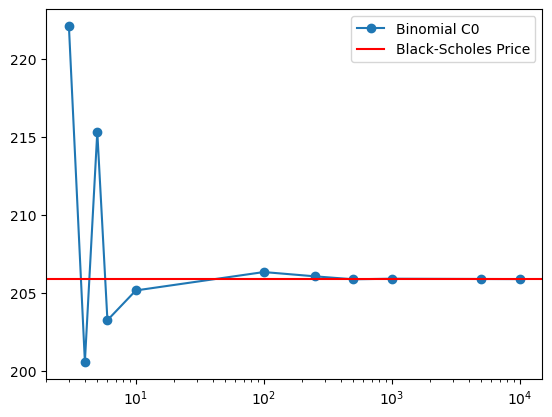

In [106]:
# Solution to (f) –––––

# Convert discrete parameters to continuous
def binomial_tree_european_call(S0, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    disc = np.exp(-r * dt)
    q = (np.exp(r * dt) - d) / (u - d)
    
    # terminal payoffs with Cox-Ross-Rubinstein (# of steps agnostic)
    ST = np.array([S0 * (u ** j) * (d ** (N - j)) for j in range(N+1)])
    C = np.maximum(ST - K, 0)
        
    # backward induction
    for _ in range(N):
        C = disc * (q * C[1:] + (1 - q) * C[:-1])
    return C[0]

steps_all = [3, 4, 5, 6, 10, 100, 250, 500, 1000, 5000, 10000]
C0_values = []
S0 = dS0
K = 6500
T = 0.25
r = np.log(1+risk_free_annual)   # continuous, annualized
sigma = dSample_std*np.sqrt(12)     # fill with your annualized value

for steps in steps_all:
    C0 = binomial_tree_european_call(S0, K, r, sigma, T, steps)
    C0_values.append(C0)
    print(f"Steps: {steps}, C0: {C0:.6f}")


# Reference Black-Scholes price
plt.plot(steps_all, C0_values, 'o-', label='Binomial C0')
plt.axhline(y=call_price_bs, color='r', label='Black-Scholes Price')
plt.xscale('log')
plt.legend()
plt.show()


As we increase the number of steps in the binomial tree, we see that the option value fluctuates around the Black–Scholes benchmark when the step size is very coarse (e.g. 3–10 steps). Once we move to a few hundred steps, the estimates stabilize and converge quickly toward the Black–Scholes price of about 205.89. The convergence is clear in the graph: the binomial values approach the continuous-time model as $N$ grows, with only tiny differences (on the order of cents) beyond a few hundred steps. This confirms that the binomial method is consistent, and that with finer discretization we recover the Black–Scholes value for a European call.

### **Question $(g)$**
Using the binomial tree with 10,000 steps, plot the probability distribution of the 3-months log-return on the S&P-500 index under the risk-neutral probability measure and comment on the shape of the distribution.

Calculate the expected value of this distribution and explain the result of your calculation.

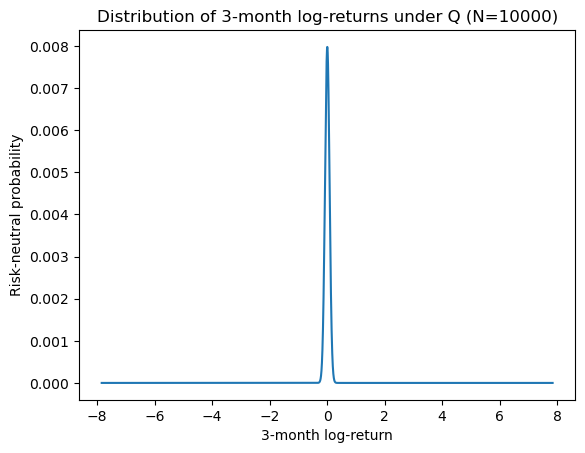

Expected 3-month log-return (risk-neutral): 0.004319


In [109]:
# Solution to (g) –––––

N = 10000
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = np.exp(-sigma * np.sqrt(dt))
disc = np.exp(-r * dt)
q = (np.exp(r * dt) - d) / (u - d)

# All possible numbers of up-moves
k_vals = np.arange(N + 1)

# Log-returns at each terminal node
log_returns = k_vals * np.log(u/d) + N * np.log(d)

# Binomial probabilities under risk-neutral measure
probabilities = binom.pmf(k_vals, N, q)

# Plot distribution
plt.plot(log_returns, probabilities)
plt.xlabel('3-month log-return')
plt.ylabel('Risk-neutral probability')
plt.title(f'Distribution of 3-month log-returns under Q (N={N})')
plt.show()

expected_log_return = np.sum(probabilities * log_returns)
print(f"Expected 3-month log-return (risk-neutral): {expected_log_return:.6f}")


With 10,000 steps the log-return distribution essentially collapses into a very narrow bell curve. On the plot it looks like a spike because most of the probability mass is concentrated around the mean, which is what we expect from the CLT as the number of steps grows.

We find that the expected 3-month log-return under the risk-neutral measure is about **0.43%**. This is lower than the risk-free simple return of about **0.74%**, because in log terms the expectation is shifted down by $\tfrac{1}{2}\sigma^2T$. In other words, under $Q$ the index grows on average at the risk-free rate in simple terms, but in log terms the mean is smaller due to volatility.

### **Question $(h)$**
Change the code such that it can compute the price of a European put option with strike price 6,500 and maturity 3 months. 

Do the same as in $(f)$: provide a graph that shows the option value as a function of the number of steps and also include the Black-Scholes value of the put option.

Verify whether the put-call parity holds.

In [112]:
# Solution to (h) –––––

S0 = dS0
K = 6500
T = 0.25
r_continuous = np.log(1+risk_free_annual)   # continuous, annualized
sigma_annual = dSample_std*np.sqrt(12)

def black_scholes_put(S0, K, r, sigma, T):
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r*T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

def binomial_tree_european_put(S0, K, r, sigma, T, N): #same with call function but P = max(ST-K)
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    q = (np.exp(r * dt) - d) / (u - d)
    disc = np.exp(-r * dt)
    
    ST = np.array([S0 * (u ** j) * (d ** (N - j)) for j in range(N+1)])
    P = np.maximum(K - ST, 0)  
        
    # Backward induction
    for _ in range(N):
        P = disc * (q * P[1:] + (1 - q) * P[:-1])
    return P[0]

bs_put_price = black_scholes_put(S0, K, r_continuous, sigma_annual, T)
bs_call_price = black_scholes_call(S0, K, r_continuous, sigma_annual, T)
print(f"Black-Scholes Put Price: ${bs_put_price:.2f}")
print(f"Black-Scholes Call Price: ${bs_call_price:.2f}")

Black-Scholes Put Price: $197.78
Black-Scholes Call Price: $205.89


In [113]:
# Convergence
steps_all = [3, 6, 10, 50, 100, 250, 500, 1000, 5000, 10000]
put_values = []
call_values = []

for N in steps_all:
    put_price = binomial_tree_european_put(S0, K, r_continuous, sigma_annual, T, N)
    call_price = binomial_tree_european_call(S0, K, r_continuous, sigma_annual, T, N)
    
    put_values.append(put_price)
    call_values.append(call_price)
    
    print(f"{N:5d}  | ${put_price:8.2f} | ${call_price:9.2f}")

    3  | $  214.00 | $   222.12
    6  | $  195.14 | $   203.25
   10  | $  197.05 | $   205.16
   50  | $  198.37 | $   206.48
  100  | $  198.22 | $   206.34
  250  | $  197.95 | $   206.07
  500  | $  197.76 | $   205.88
 1000  | $  197.80 | $   205.91
 5000  | $  197.78 | $   205.90
10000  | $  197.77 | $   205.89


In [114]:
# Check put call parity
PV_strike = K * np.exp(-r_continuous * T)
theoretical_diff = S0 - PV_strike

print(f"\nPut-Call Parity Verification:")
print(f"Formula: C - P = S0 - K*e^(-rT)")
print(f"Theoretical Difference: ${theoretical_diff:.2f}")

# Using final binomial values (N=10000)
final_put = put_values[-1]
final_call = call_values[-1]
binomial_diff = final_call - final_put

print(f"\nBlack-Scholes: C - P = ${bs_call_price:.2f} - ${bs_put_price:.2f} = ${bs_call_price - bs_put_price:.2f}")
print(f"Binomial (N=10000): C - P = ${final_call:.2f} - ${final_put:.2f} = ${binomial_diff:.2f}")
print(f"Parity Error (Binomial): ${abs(binomial_diff - theoretical_diff):.4f}")



Put-Call Parity Verification:
Formula: C - P = S0 - K*e^(-rT)
Theoretical Difference: $8.12

Black-Scholes: C - P = $205.89 - $197.78 = $8.12
Binomial (N=10000): C - P = $205.89 - $197.77 = $8.12
Parity Error (Binomial): $0.0000


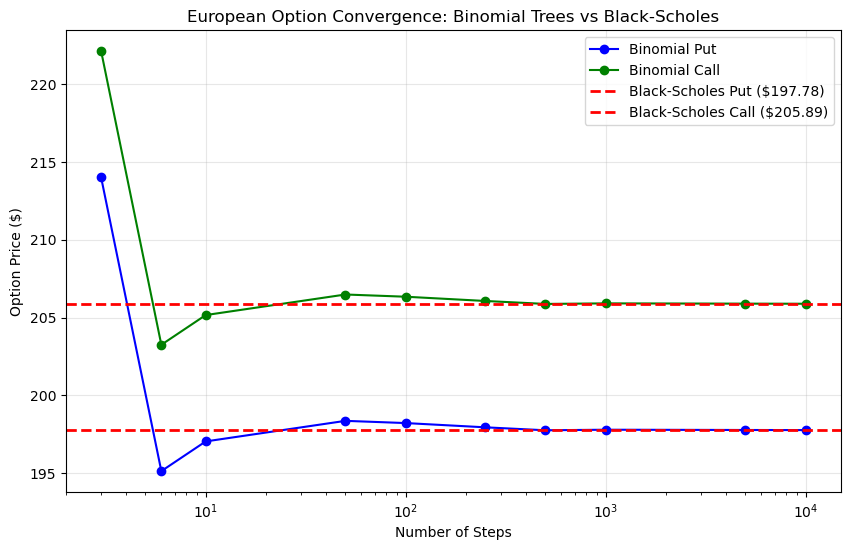

In [115]:
# Convergence Plot
plt.figure(figsize=(10, 6))
plt.plot(steps_all, put_values, 'bo-', label='Binomial Put', markersize=6)
plt.plot(steps_all, call_values, 'go-', label='Binomial Call', markersize=6)
plt.axhline(y=bs_put_price, color='r', linestyle='--', 
            label=f'Black-Scholes Put (${bs_put_price:.2f})', linewidth=2)
plt.axhline(y=bs_call_price, color='r', linestyle='--', 
            label=f'Black-Scholes Call (${bs_call_price:.2f})', linewidth=2)

plt.xscale('log')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price ($)')
plt.title('European Option Convergence: Binomial Trees vs Black-Scholes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

We extended our code to price European puts as well. For the put with strike 6,500 and maturity 3 months, the Black–Scholes value is **197.78**, while the corresponding call value is **205.89**.

Looking at the convergence of the binomial tree, we see that with only a few steps the estimates are noisy (e.g. at $N=3$, the put is 214.00 and the call 222.12). As we increase the number of steps, the values settle down: at $N=100$ we already get a put of **198.22** and a call of **206.34**, and by $N=10{,}000$ we converge to **197.77** for the put and **205.89** for the call—essentially identical to the Black–Scholes benchmarks.

Finally, we verify put–call parity. The theoretical difference is

$$
C - P = S_0 - K e^{-rT} \approx 8.12,
$$

and both the Black–Scholes and binomial models (at $N=10{,}000$) give **8.12** as well. The parity error is practically zero, which confirms that our implementation is consistent.

### **Question $(i)$**
Now suppose that the option is American.

Change the code such that it can handle early exercise opportunities.

What are the values of the American put and call (strike 6,500 and maturity 3 months) for the same initial parameters?

Comment on the difference in value between the European put option and the American put option.

In [116]:
# Solution to (i) –––––

def binomial_tree_american_put(S0, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    q = (np.exp(r * dt) - d) / (u - d)
    disc = np.exp(-r * dt)
    
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S0 * (u ** j) * (d ** (i - j))
    
    # Initialize options tree
    option_tree = np.zeros((N+1, N+1))
    for j in range(N+1):
        option_tree[j, N] = max(0, K - stock_tree[j, N])  # put payoff
    
    # Backward induction
    for i in range(N-1, -1, -1): 
        for j in range(i+1):
            continuation_value = disc * (q * option_tree[j+1, i+1] + (1-q) * option_tree[j, i+1])
            exercise_value = max(0, K - stock_tree[j, i])
            option_tree[j, i] = max(continuation_value, exercise_value)
    
    return option_tree[0, 0]

def binomial_tree_american_call(S0, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    q = (np.exp(r * dt) - d) / (u - d)
    disc = np.exp(-r * dt)
    
    # Initialize stock tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S0 * (u ** j) * (d ** (i - j))
    
    # Initialize option tree
    option_tree = np.zeros((N+1, N+1))
    for j in range(N+1):
        option_tree[j, N] = max(0, stock_tree[j, N] - K)  # Call payoff
    
    # Backward induction 
    for i in range(N-1, -1, -1):  
        for j in range(i+1):
            continuation_value = disc * (q * option_tree[j+1, i+1] + (1-q) * option_tree[j, i+1])
            exercise_value = max(0, stock_tree[j, i] - K)
            option_tree[j, i] = max(continuation_value, exercise_value)
    return option_tree[0, 0]

european_put = black_scholes_put(S0, K, r_continuous, sigma_annual, T)
european_call = black_scholes_call(S0, K, r_continuous, sigma_annual, T)

print(f"Black-Scholes Put: ${european_put:.2f}")
print(f"Black-Scholes Call: ${european_call:.2f}")

print("\nCalculating American options with different steps:")
steps = [100, 250, 500, 1000, 2000]

for N in steps:
    american_put = binomial_tree_american_put(S0, K, r_continuous, sigma_annual, T, N)
    american_call = binomial_tree_american_call(S0, K, r_continuous, sigma_annual, T, N)
    
    put_diff = american_put - european_put
    call_diff = american_call - european_call
    
    print(f"N={N}:")
    print(f"Put: ${american_put:.2f} (diff: ${put_diff:.2f})")
    print(f"Call: ${american_call:.2f} (diff: ${call_diff:.2f})")
    
    if N == steps[-1]:
        final_put = american_put
        final_call = american_call

print("\nFinal comparison:")
put_diff = final_put - european_put
call_diff = final_call - european_call

print(f"Put options:")
print(f"European: ${european_put:.2f}")
print(f"American: ${final_put:.2f}")
print(f"Difference: ${put_diff:.2f} ({(put_diff/european_put*100):.1f}%)\n")

print(f"Call options:")
print(f"European: ${european_call:.2f}")
print(f"American: ${final_call:.2f}")
print(f"Difference: ${call_diff:.2f} ({(call_diff/european_call*100):.1f}%)")

Black-Scholes Put: $197.78
Black-Scholes Call: $205.89

Calculating American options with different steps:
N=100:
Put: $202.63 (diff: $4.85)
Call: $206.34 (diff: $0.45)
N=250:
Put: $202.32 (diff: $4.54)
Call: $206.07 (diff: $0.18)
N=500:
Put: $202.14 (diff: $4.36)
Call: $205.88 (diff: $-0.01)
N=1000:
Put: $202.16 (diff: $4.39)
Call: $205.91 (diff: $0.02)
N=2000:
Put: $202.15 (diff: $4.37)
Call: $205.90 (diff: $0.01)

Final comparison:
Put options:
European: $197.78
American: $202.15
Difference: $4.37 (2.2%)

Call options:
European: $205.89
American: $205.90
Difference: $0.01 (0.0%)


For the European benchmark, the Black–Scholes prices are **197.78** for the put and **205.89** for the call.

When we switch to American options and allow for early exercise, the results change only for the put. With $N=2000$ steps, the American put is valued at **202.15**, which is about **4.37 higher** than the European put (a **2.2% premium**). The American call, on the other hand, converges to **205.90**, virtually identical to the European call.

This makes sense: early exercise is never optimal for a non-dividend-paying call, so its value is the same as the European call. For puts, early exercise can be advantageous when the option is sufficiently in-the-money, which explains why the American put carries a modest premium over its European counterpart.

## **Export Python Code and Markdown Cells**

In [119]:
# Export python code / markdown cells separately


# Load notebook
nb = nbformat.read("/Users/milanpeter/Documents/University/Vrije Universiteit Amsterdam/Stochastic Processes - the Fundamentals/Computer Assignment/spf-assignment-1-script.ipynb", as_version=4)

# Write code cells into one python script
with open("spf-a1-script.py", "w", encoding="utf-8") as f:
    for cell in nb.cells:
        if cell.cell_type == "code":
            f.write(cell.source.replace("–", "-") + "\n\n")

# Collect markdown cells
md_cells = [cell['source'] for cell in nb.cells if cell['cell_type'] == 'markdown']

# Write them into one markdown file
with open("spf-a1-markdown.md", "w") as f:
    f.write("\n\n".join(md_cells))

# Convert markdown to LaTeX using pandoc
# run in bash
# pandoc spf-a1-markdown.md -o spf-a1-markdown.tex